In [ ]:
import os
import shutil

root_path = '/content/'

# Переход в корневую директорию
os.chdir(root_path)

# @title Удаление всех папок и файлов в root_path
for file in os.listdir():
    file_path = os.path.join(root_path, file)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print(f"Failed to delete {file_path}. Reason: {e}")


In [ ]:
!nvidia-smi


Sat Dec 23 07:03:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


## **Установка YOLOv8**

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image


## **Экспорт dataset из Roboflow**

In [ ]:
version = 3

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xDGnPrVYzgU3DyNb2GUc")
project = rf.workspace("internship3-u7nry").project("construction-equipment-segen")
dataset = project.version(version).download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to construction-equipment-3 in yolov8:: 100%|██████████| 412/412 [00:00<00:00, 2987.15it/s]


## **Обучение модели**

In [ ]:
import shutil
import os

# @title Перемещение директории
src_path = f'/content/construction-equipment-{version}/'
dst_path = '/content/datasets/'

# Проверка существования директории и создание, если отсутствует
if not os.path.exists(dst_path):
    os.makedirs(dst_path)

# Перемещение файлов
shutil.move(src_path, dst_path)

dataset_path = f'/content/datasets/construction-equipment-{version}/'


In [ ]:
%cd {HOME}

# @title Обучение YOLOv8
!yolo task=detect mode=train model=yolov8m.pt data={dataset_path}data.yaml epochs=300 plots=True


/content
100% 49.7M/49.7M [00:00<00:00, 358MB/s]
New https://pypi.org/project/ultralytics/8.0.229 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/construction-equipment-3/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride

In [ ]:
!ls {HOME}/runs/detect/train/


args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      val_batch0_labels.jpg
confusion_matrix.png				    R_curve.png       val_batch0_pred.jpg
events.out.tfevents.1703315223.60be179fe749.2669.0  results.csv       val_batch1_labels.jpg
F1_curve.png					    results.png       val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights
labels.jpg					    train_batch1.jpg


/content


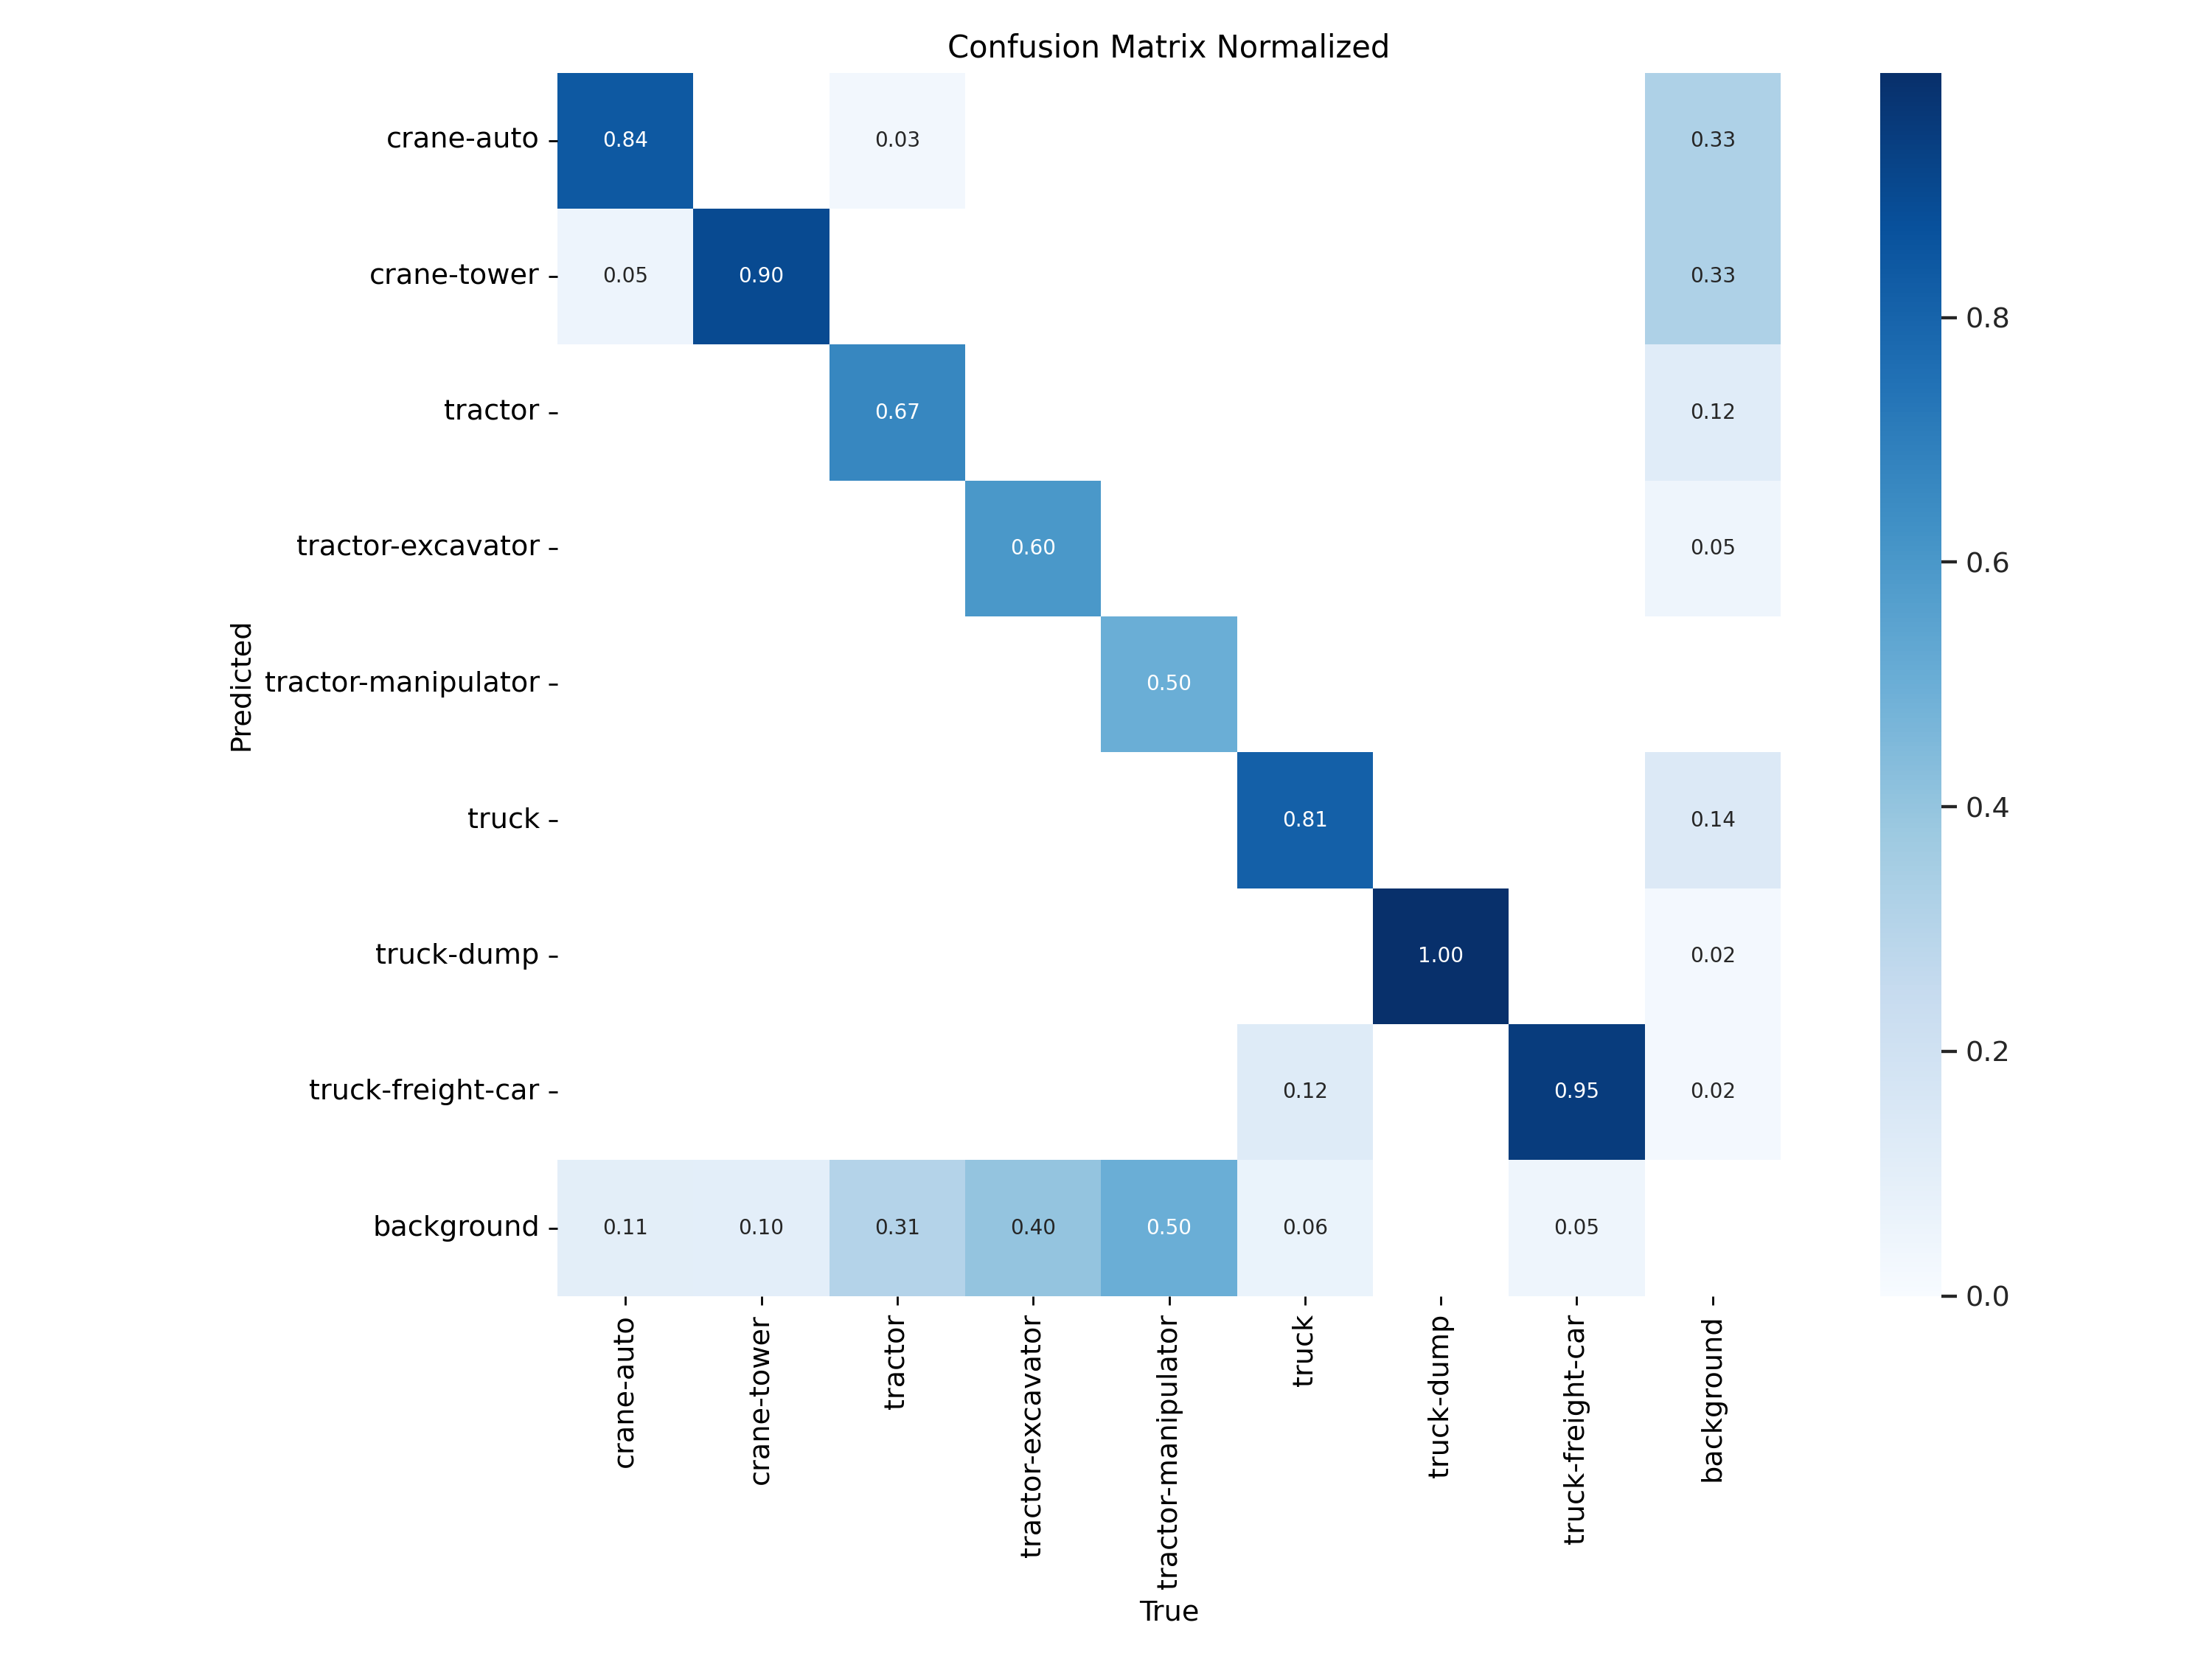

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=1500)


/content


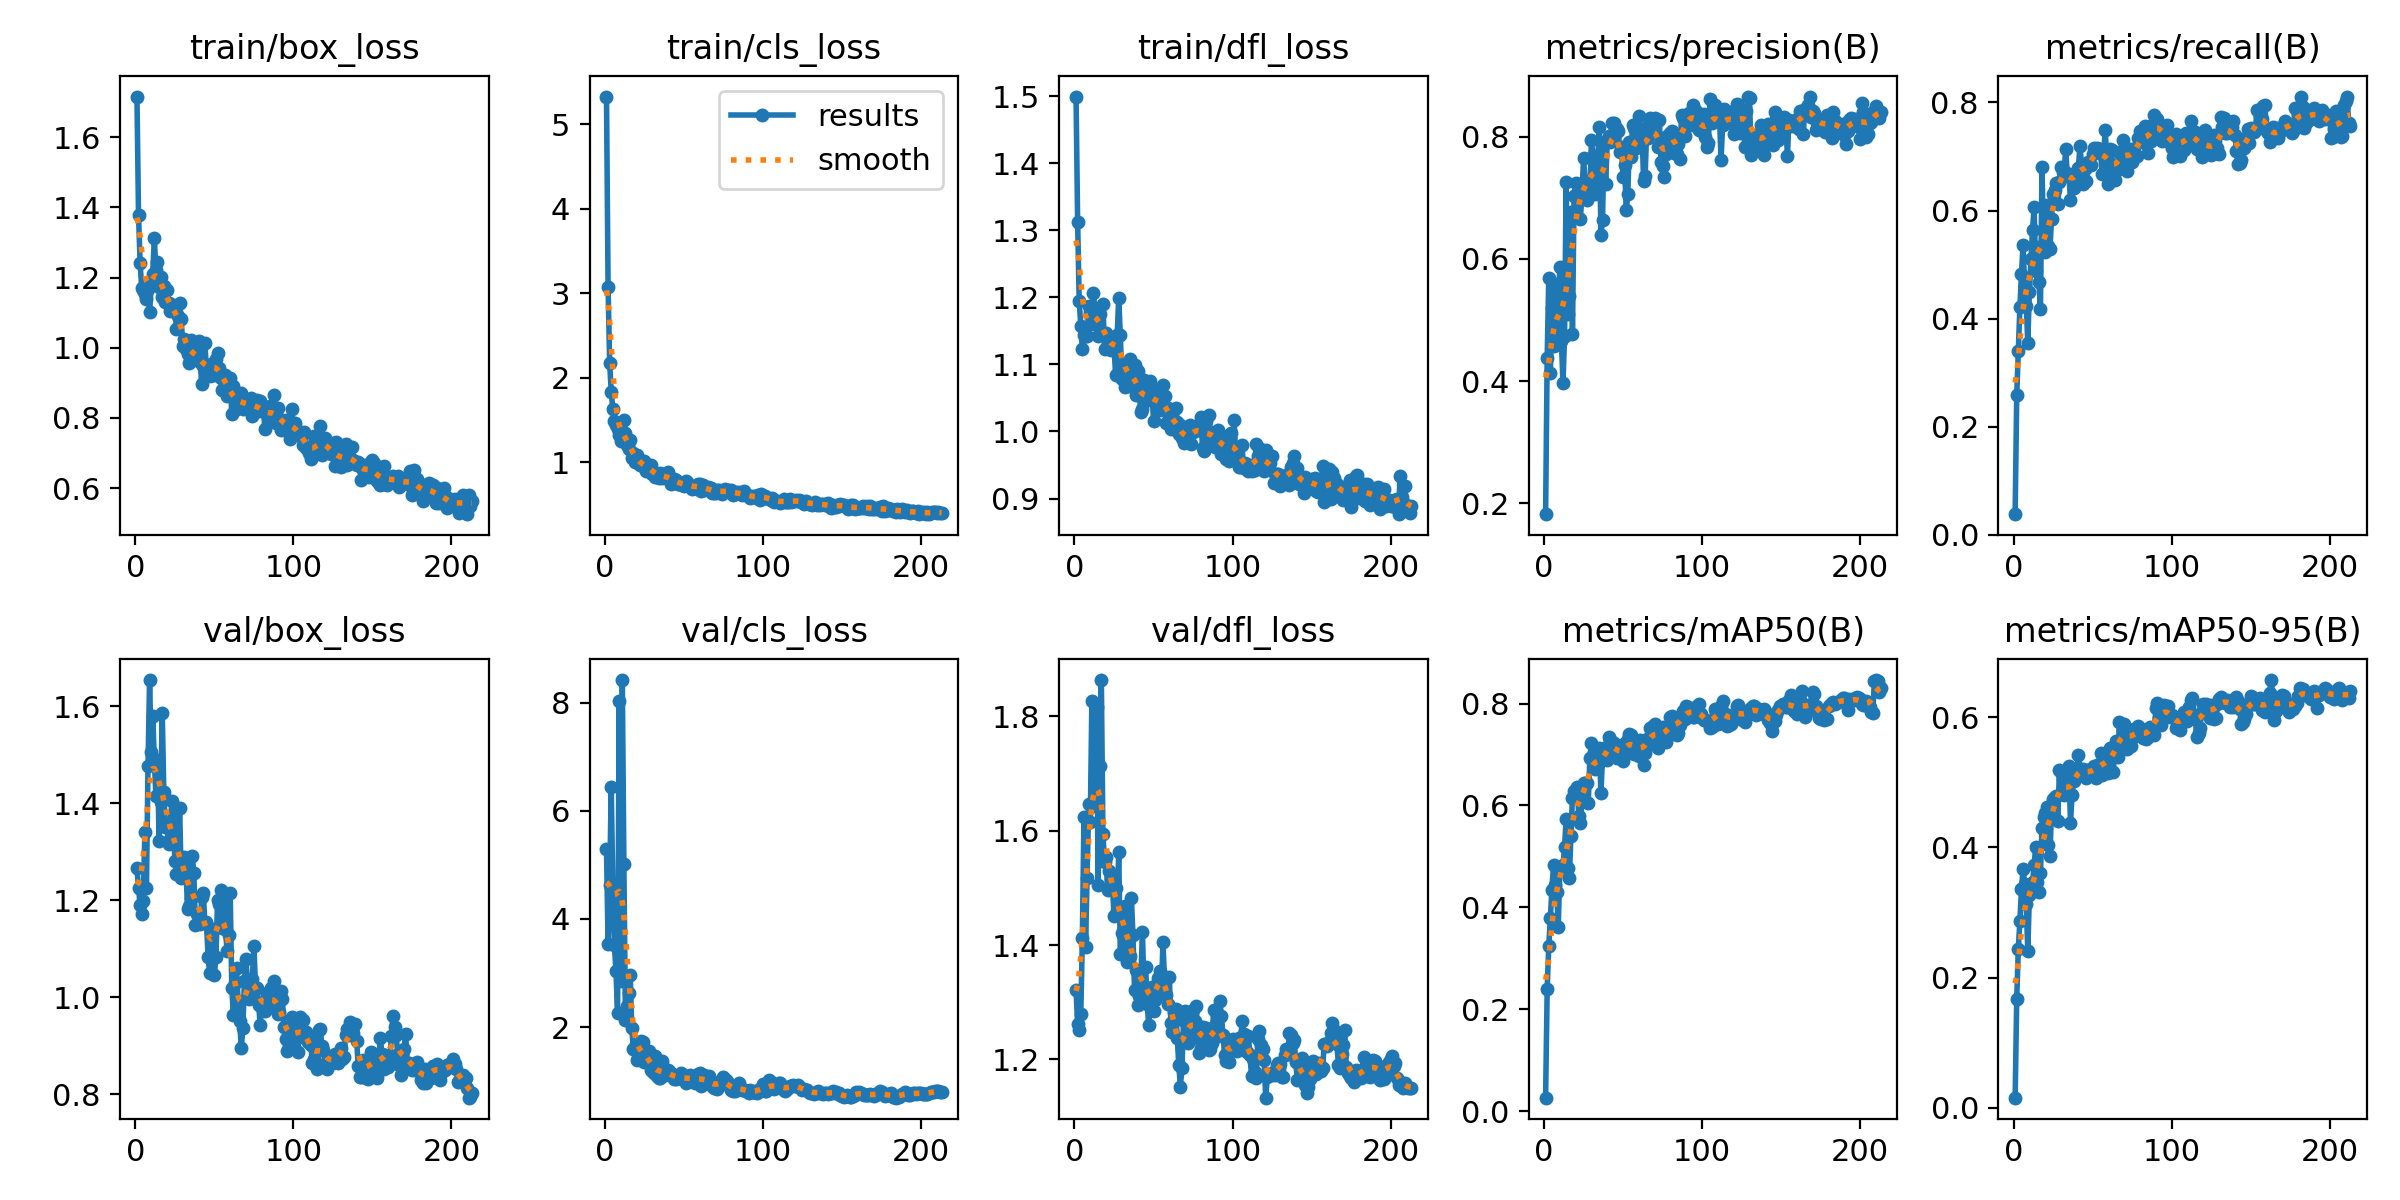

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1500)


/content


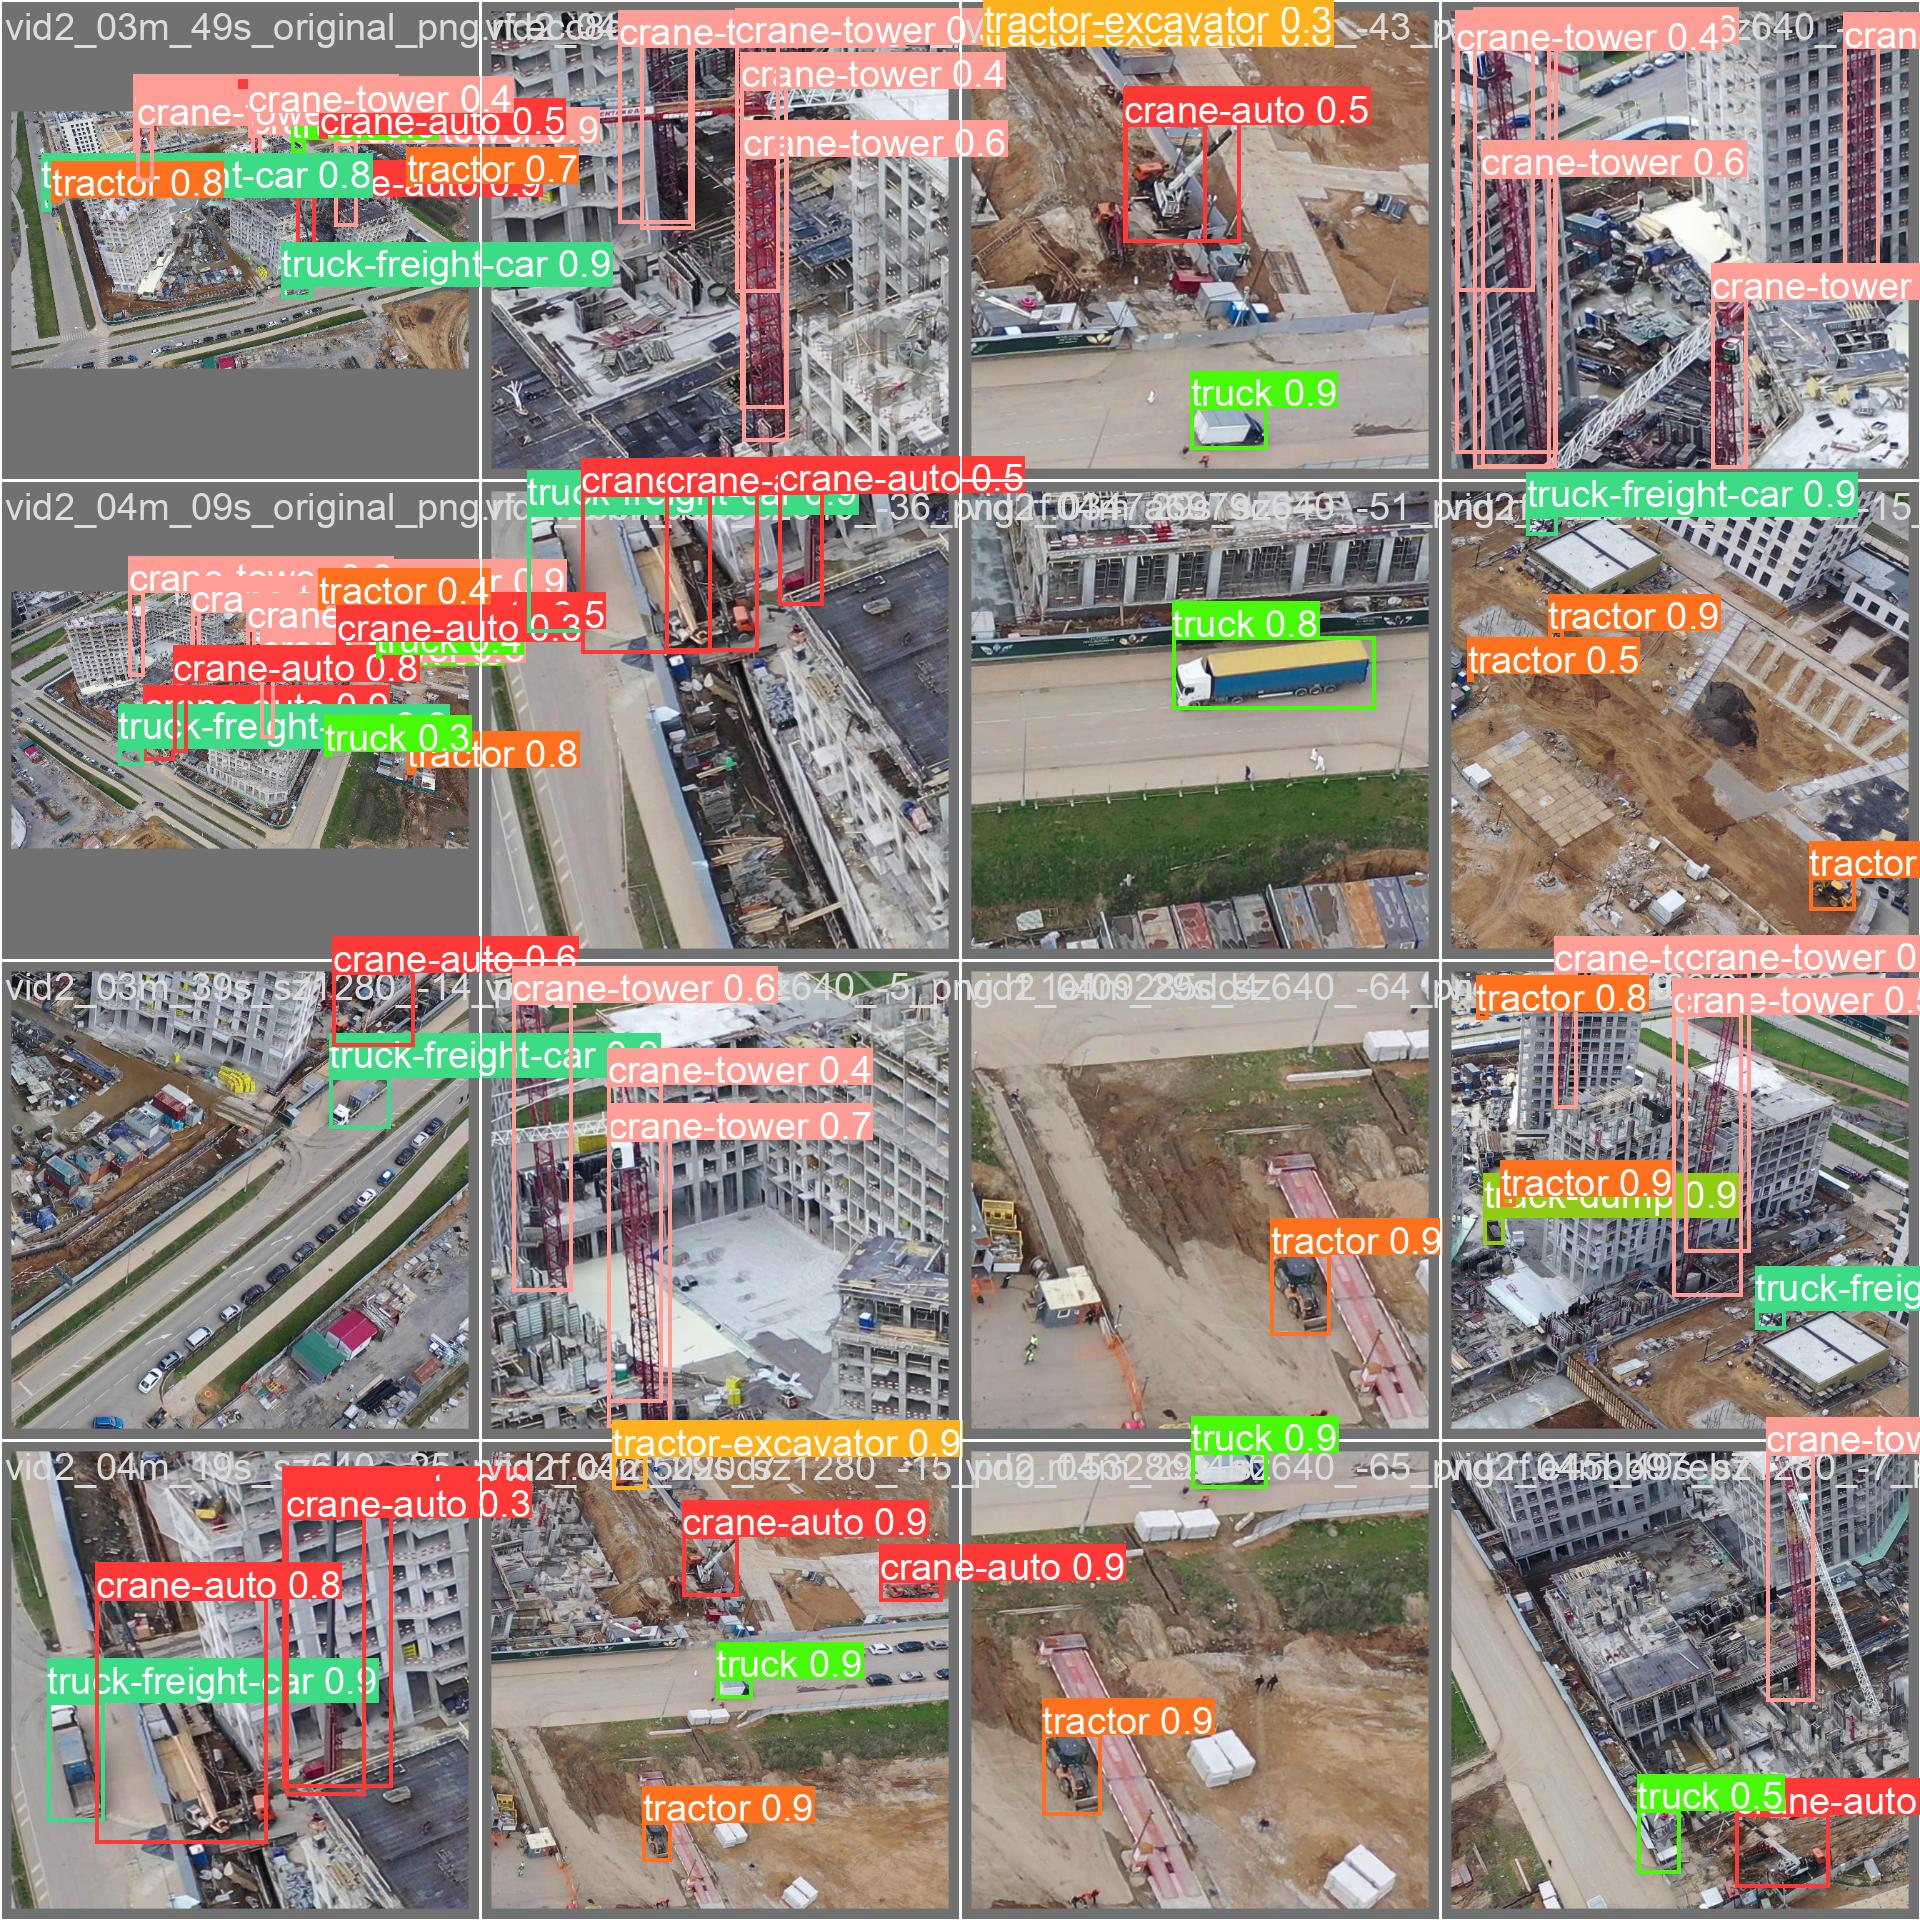

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1500)


## **Валидация модели**

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset_path}data.yaml


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/construction-equipment-3/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:05<00:00,  1.88s/it]
                   all         40        164      0.832       0.74      0.824      0.655
            crane-auto         40         38      0.901      0.721       0.86      0.624
           crane-tower         40         40      0.883        0.8      0.882      0.584
               tractor         40         36      0.877      0.596      0.772      0.544
     tractor-excavator         40         10      0.843        0.6      0.809      0.638
   tractor-manipulator         40          2      0.817        0.5       0.58      0.522
                 tru

## **Инференс модели**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset_path}test/images save=True


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs

image 1/20 /content/datasets/construction-equipment-3/test/images/vid2_03m_39s_sz1280_-10_png.rf.8243e14bf3a131158c103302ea06d6bd.jpg: 640x640 1 truck, 1 truck-freight-car, 37.1ms
image 2/20 /content/datasets/construction-equipment-3/test/images/vid2_03m_49s_sz1280_-4_png.rf.a9454f78e34e25285ce57c8d825ef2c2.jpg: 640x640 3 crane-autos, 3 crane-towers, 1 tractor, 1 tractor-manipulator, 2 trucks, 37.1ms
image 3/20 /content/datasets/construction-equipment-3/test/images/vid2_03m_49s_sz1280_-9_png.rf.24ec18a26946995373238437cb6e2bce.jpg: 640x640 2 crane-autos, 1 crane-tower, 1 truck-freight-car, 37.1ms
image 4/20 /content/datasets/construction-equipment-3/test/images/vid2_03m_49s_sz640_-6_png.rf.cd0fe8f7f67258c17786e2a639e79a1c.jpg: 640x640 1 crane-auto, 2 crane-towers, 1 tractor-excavator, 37.1ms
image 5/20 /conten

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:]:
      display(Image(filename=image_path, width=600))
      print("\n")


Output hidden; open in https://colab.research.google.com to view.

## **Деплой модели на Roboflow**

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")


View the status of your deployment at: https://app.roboflow.com/internship3-u7nry/construction-equipment-segen/3
Share your model with the world at: https://universe.roboflow.com/internship3-u7nry/construction-equipment-segen/model/3


## **Сохранение лучшей модели и тестирование параметра confidence**

In [ ]:
# Монтируем Google Диск
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil
import datetime

# @title Сохранение лучшей модели best.pt и .yaml файла на Google Disk
# Указываем путь для сохранения
save_path = '/content/drive/MyDrive/Intership_03/YOLOv8_trained/'

last_best_path = f"{save_path}Last_Best/"
output_path = f"{save_path}Output/"

# Создаем уникальное имя папки на основе даты и времени
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
save_folder = f'{save_path}{timestamp}/'

# Создаем папку для сохранения
shutil.rmtree(save_folder, ignore_errors=True)
os.makedirs(save_folder)

shutil.rmtree(last_best_path, ignore_errors=True)
os.makedirs(last_best_path)

shutil.rmtree(output_path, ignore_errors=True)
os.makedirs(output_path)

# Копируем файл best.pt
shutil.copy('/content/runs/detect/train/weights/best.pt', save_folder)
shutil.copy('/content/runs/detect/train/weights/best.pt', last_best_path)

# Копируем файл yolov8.yaml (или соответствующий .yaml файл)
shutil.copy(f'{dataset_path}data.yaml', save_folder)

print(f'Model files saved to: {save_folder}')


Model files saved to: /content/drive/MyDrive/Intership_03/YOLOv8_trained/20231223_080238/


In [ ]:
# @title Обнаружение объектов (detection), используя сохранённую лучшую модель best.pt
!yolo task=detect mode=predict model={last_best_path}best.pt source='{output_path}Test/vid2_04m_49s_original.png' conf=0.5 show=True save=True


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Intership_03/YOLOv8_trained/Output/Test/vid2_04m_49s_original.png: 384x640 2 crane-autos, 5 crane-towers, 4 tractors, 1 tractor-excavator, 2 trucks, 1 truck-dump, 1 truck-freight-car, 84.3ms
Speed: 3.4ms preprocess, 84.3ms inference, 649.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from PIL import Image
from IPython.display import display

# @title Использование параметра conf по умолчанию

# Путь к сохраненному изображению
result_image_path = '/content/runs/detect/predict2/vid2_04m_49s_original.png'

# Открываем изображение с использованием библиотеки Pillow
result_image = Image.open(result_image_path)

# Отображаем изображение в блокноте Colab
display(result_image)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import glob
from IPython.display import Image, display

# @title Использование параметра conf=0.5

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.png')[:]:
      display(Image(filename=image_path, width=1500))
      print("\n")


Output hidden; open in https://colab.research.google.com to view.

## **Вывод:**

**Качеством обнаружения строительной техники удовлетворён 🌝**

При conf=0.5 нет ошибочного обнаружения класса "truck" (conf=0.35), но также и не обнаружен один объект класса "tractor" (conf=0.32)

В принципе этот объект класса "tractor" (conf=0.32) достаточно мелкий и невзрачный, сливающийся с фоном.

**P.S.:**

Количество размеченных изображений: **200**

Для до-обучения YOLOv8 была выбрана модель: **yolov8m.pt**

epochs: выбрано 300, закончилось на 213, т.к. на протяжении 50 эпох не было улучшений (т.е. по факту **обучение 163 эпохи**)


По результатам валидации обученной модели YOLOv8 можно сделать следующие выводы:

**1.	Общая оценка (All):**

>	Количество изображений: 40

>	Общее количество объектов: 164

>	Precision (P): 83.6%

>	Recall (R): 74.3%

>	mAP50 (Mean Average Precision): 82.7%

>	mAP50-95 (Mean Average Precision with IoU from 50% to 95%): 65.1%

**2.	Скорость:**

>	Время предобработки: 0.2 мс

>	Время инференса: 12.4 мс

>	Время потери (loss): 0.0 мс

>	Время постобработки: 3.0 мс

В общем, **модель показывает хорошие результаты с высокими значениями точности и полноты для большинства классов объектов**, хотя датасет не сбалансирован и можно применить аугментацию к уже размеченной базе. Либо ещё разметить, т.к. всего изображений в базе 757 (из них размечено только 200). Ещё в запасе есть 557 изображений.

Также, **согласно mAP50 и mAP50-95, общую производительность модели можно оценить как хорошую.**